# Steel Defect Detection - EDA 01

In [30]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
from itertools import combinations
from collections import Counter

In [2]:
# load common py
sys.path.append('../src')
import config
import common_utils
import data_utils
import train_utils
import plot_utils

In [3]:
IMAGE_FOLDER = os.path.join(config.DATA_FOLDER, 'train_images')
TRAIN_CSV = os.path.join(config.DATA_FOLDER, 'train.csv') 

In [4]:
df = pd.read_csv(TRAIN_CSV)

In [5]:
df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [6]:
# list all files in the image folder
image_files = os.listdir(os.path.expanduser(IMAGE_FOLDER))
total_images = len(image_files)
print(f'Total images: {len(image_files)}')

Total images: 12568


Check length csv

In [7]:
len(df)

print('Total defects:', len(df))

Total defects: 7095


In [8]:
# add column is_defect
df['IsDefect'] = 1

## Defect Class Distribution

In [9]:
# distinct imageId
unique_defect_images = df['ImageId'].unique()
total_unique_defect_images = len(unique_defect_images)
print(f'Distinct ImageIds (defective): {total_unique_defect_images}')

Distinct ImageIds (defective): 6666


In [10]:
total_non_defect_images = total_images - total_unique_defect_images
print(f'Distinct ImageIds (non-defective): {total_non_defect_images}')

Distinct ImageIds (non-defective): 5902


In [11]:
percent_defective = (total_unique_defect_images / total_images) * 100
percent_non_defective = (total_non_defect_images / total_images) * 100

print(f'Percentage of defective images: {percent_defective:.2f}%')
print(f'Percentage of non-defective images: {percent_non_defective:.2f}%')

Percentage of defective images: 53.04%
Percentage of non-defective images: 46.96%


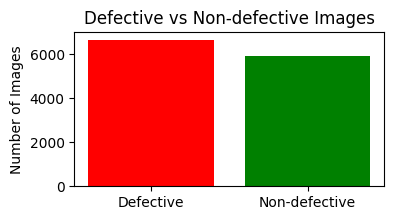

In [12]:

labels = ['Defective', 'Non-defective']
counts = [total_unique_defect_images, total_non_defect_images]

plt.figure(figsize=(4,2))
plt.bar(labels, counts, color=['red', 'green'])
plt.ylabel('Number of Images')
plt.title('Defective vs Non-defective Images')
plt.show()

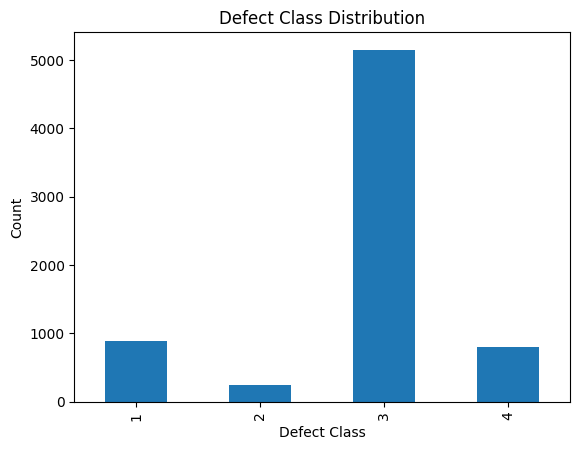

In [13]:
df['ClassId'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Defect Class')
plt.ylabel('Count')
plt.title('Defect Class Distribution')
plt.show()

In [14]:
df['ClassId'].value_counts(normalize=True) * 100

# Defect type 3 is a majority defect, 72.58%

ClassId
3    72.586328
1    12.642706
4    11.289641
2     3.481325
Name: proportion, dtype: float64

## Image with Multiple Defects

In [15]:
# check duplicate images, one image can have multiple defects types
# Get all duplicate ImageId values
duplicate_image_ids = df[df['ImageId'].duplicated()]['ImageId'].unique()
total_multi_defective_images = len(duplicate_image_ids)
print('Duplicate ImageIds:', total_multi_defective_images)

Duplicate ImageIds: 427


In [16]:
# list imageids that are duplicated
duplicate_image_df= df[ df['ImageId'].duplicated()==True ]

In [17]:
duplicate_image_df

,ImageId,ClassId,EncodedPixels,IsDefect
6,0025bde0c.jpg,4,315139 8 315395 15 315651 16 315906 17 316162 ...,1
9,002fc4e19.jpg,2,145658 7 145901 20 146144 33 146386 47 146629 ...,1
19,008ef3d74.jpg,2,375439 5 375687 14 375935 24 376182 34 376430 ...,1
22,00ac8372f.jpg,2,98114 24 98370 72 98626 119 98881 168 99137 19...,1
27,00c88fed0.jpg,2,13428 8 13684 24 13940 39 14196 55 14452 71 14...,1
...,...,...,...,...
7012,fd26ab9ad.jpg,4,194608 3 194825 19 194860 10 195078 29 195112 ...,1
7031,fdb7c0397.jpg,4,155020 6 155268 16 155516 27 155764 37 156012 ...,1
7044,fe2234ba6.jpg,3,91356 1 91610 4 91865 6 92119 9 92374 11 92628...,1
7079,ff6bfada2.jpg,4,90877 2 91131 4 91385 6 91638 9 91892 12 92146...,1


In [18]:
duplicate_image_df['ImageId'].value_counts()

ImageId
ef24da2ba.jpg    2
db4867ee8.jpg    2
0025bde0c.jpg    1
b595566b3.jpg    1
b94f92e51.jpg    1
                ..
61f93524d.jpg    1
6149dc4ee.jpg    1
60d7248a8.jpg    1
603bb9003.jpg    1
ff6e35e0a.jpg    1
Name: count, Length: 427, dtype: int64

In [19]:
duplicate_image_df['ImageId'].value_counts()[duplicate_image_df['ImageId'].value_counts() > 1]

# only 2 images have more than 2 defects

ImageId
ef24da2ba.jpg    2
db4867ee8.jpg    2
Name: count, dtype: int64

In [20]:
df[df['ImageId'].isin(['ef24da2ba.jpg','db4867ee8.jpg'])]

,ImageId,ClassId,EncodedPixels,IsDefect
6101,db4867ee8.jpg,1,349941 2 350194 6 350447 11 350700 15 350953 1...,1
6102,db4867ee8.jpg,2,354411 17 354634 50 354857 82 355096 99 355351...,1
6103,db4867ee8.jpg,3,233729 3008 236801 64,1
6650,ef24da2ba.jpg,1,366699 32 366955 32 367210 33 367466 33 367722...,1
6651,ef24da2ba.jpg,2,366338 17 366594 50 366850 82 367106 99 367362...,1
6652,ef24da2ba.jpg,3,178369 64 178498 191 178690 255 178946 255 179...,1


In [29]:
imageid_with_3_defects = ['ef24da2ba.jpg','db4867ee8.jpg']

only 2 images have 3 defect types

In [21]:
total_images_with_exactly_two_defects = duplicate_image_df['ImageId'].value_counts()[duplicate_image_df['ImageId'].value_counts() == 1].count()

print('Total images with exactly 2 defects:', total_images_with_exactly_two_defects)

# 425 images have exactly 2 defects

Total images with exactly 2 defects: 425


In [22]:
df[df['ImageId']=='0391d44d6.jpg']

,ImageId,ClassId,EncodedPixels,IsDefect
102,0391d44d6.jpg,3,63384 14 63640 40 63896 54 64152 54 64408 54 6...,1
103,0391d44d6.jpg,4,67859 3 68111 9 68362 15 68614 21 68867 26 691...,1


In [23]:
print('Total images with defects:', total_unique_defect_images)
print('Total images with multiple defects:', total_multi_defective_images)
print('Total images with single defect:', total_unique_defect_images - total_multi_defective_images)
print('Total images with exactly 2 defects:', total_images_with_exactly_two_defects)
print('Total images with more than 2 defects:', total_multi_defective_images - total_images_with_exactly_two_defects)
print('Total defects:', len(df))



Total images with defects: 6666
Total images with multiple defects: 427
Total images with single defect: 6239
Total images with exactly 2 defects: 425
Total images with more than 2 defects: 2
Total defects: 7095


In [25]:
percent_single_defect = ((total_unique_defect_images - total_multi_defective_images) / total_unique_defect_images) * 100
percent_multi_defect = (total_multi_defective_images / total_unique_defect_images) * 100

print(f'Percentage of images with single defect: {percent_single_defect:.2f}%')
print(f'Percentage of images with multiple defects: {percent_multi_defect:.2f}%')

# from dataset, total images with multiple defects is 6.41% and single defect is 93.59%

Percentage of images with single defect: 93.59%
Percentage of images with multiple defects: 6.41%


In [26]:
# total images with multiple defects
len(duplicate_image_ids)

427

In [27]:
# Filter rows where ImageId is in duplicate_image_ids (images with multiple defects)
multi_defect_df = df[df['ImageId'].isin(duplicate_image_ids)]
print('Total images with multiple defects:', len(multi_defect_df))

Total images with multiple defects: 856


In [28]:
# Count the number of each defect class among multi-defect images
multi_defect_class_distribution = multi_defect_df['ClassId'].value_counts().sort_index()

# add percentage
multi_defect_class_distribution = multi_defect_class_distribution.to_frame('count')
multi_defect_class_distribution['percentage'] = (multi_defect_class_distribution['count'] / multi_defect_class_distribution['count'].sum()) * 100

multi_defect_class_distribution

,count,percentage
ClassId,,
1,128,14.953271
2,52,6.074766
3,391,45.677570
4,285,33.294393


In [37]:
# filter rows where image only has 2 defects
imageid_with_2_defects_df = multi_defect_df[~multi_defect_df['ImageId'].isin(imageid_with_3_defects)]

print('Total imageid with 2 defects:', len(imageid_with_2_defects_df))

Total imageid with 2 defects: 850


In [40]:
# find defect pair
defect_combinations = []
# group by ImageId and get combinations of ClassId for each image
for image_id, group in imageid_with_2_defects_df.groupby('ImageId'):
    classes = group['ClassId'].tolist()
    if len(classes) > 1:
        combs = combinations(sorted(classes), 2)
        defect_combinations.extend(combs)   
# count each combination
combination_counts = Counter(defect_combinations)

# convert to df
combination_df = pd.DataFrame(combination_counts.items(), columns=['Defect_Pair', 'Count']).sort_values(by='Count', ascending=False)
combination_df.head(10) 

# percentage
total_pairs = combination_df['Count'].sum()
combination_df['Percentage'] = (combination_df['Count'] / total_pairs) * 100
combination_df.head(10)




,Defect_Pair,Count,Percentage
0,"(3, 4)",284,66.823529
2,"(1, 3)",91,21.411765
1,"(1, 2)",35,8.235294
3,"(2, 3)",14,3.294118
4,"(2, 4)",1,0.235294


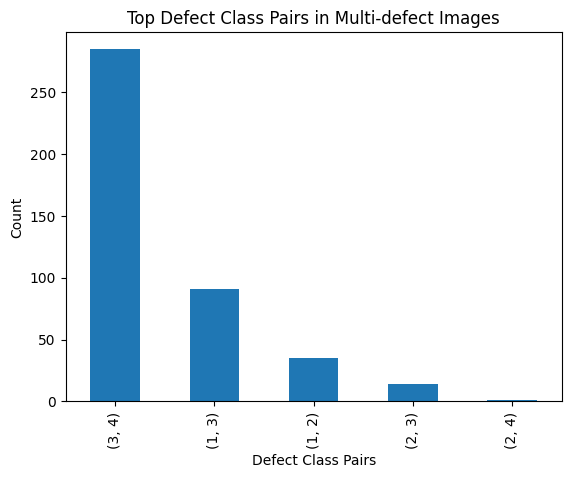

In [41]:
combination_df.plot.bar(x='Defect_Pair', y='Count', legend=False)
plt.xlabel('Defect Class Pairs')
plt.ylabel('Count')
plt.title('Top Defect Class Pairs in Multi-defect Images')
plt.show()  

List all image in folder train

In [42]:
# list all files in the image folder
image_files = os.listdir(os.path.expanduser(IMAGE_FOLDER))
total_images = len(image_files)
print(f'Total images: {len(image_files)}')


Total images: 12568


append non-defective image to df, label as 0

In [43]:
# add non-defective images to the dataframe
non_defective_image_ids = set(image_files) - set(df['ImageId'].unique())
non_defective_df = pd.DataFrame({'ImageId': list(non_defective_image_ids),
                                'EncodedPixels': [np.nan] * len(non_defective_image_ids),
                                'ClassId': [0] * len(non_defective_image_ids),
                                'IsDefect': [0] * len(non_defective_image_ids)})

non_defective_df

,ImageId,EncodedPixels,ClassId,IsDefect
0,412061b78.jpg,NaN,0,0
1,a8a543129.jpg,NaN,0,0
2,de6d967a7.jpg,NaN,0,0
3,c70ef1294.jpg,NaN,0,0
4,f3a5748e2.jpg,NaN,0,0
...,...,...,...,...
5897,1651fe36f.jpg,NaN,0,0
5898,d251e9992.jpg,NaN,0,0
5899,4b5006ba7.jpg,NaN,0,0
5900,554cbd6bf.jpg,NaN,0,0


In [44]:
# append non-defective dataframe to the original dataframe
df = pd.concat([df, non_defective_df], ignore_index=True)

In [45]:
total_non_defect = total_images - total_unique_defect_images

print('Total images in folder:', total_images)
print('Total unique defective images:', total_unique_defect_images)
print('Total non-defective images:', total_non_defect)
print('Total images with multiple defects:', total_multi_defective_images)

# calculate percentages defective and non-defective
print('')
percent_defective = (total_unique_defect_images / total_images) * 100
percent_non_defective = (total_non_defect / total_images) * 100
print(f'Percentage of defective images: {percent_defective:.2f}%')
print(f'Percentage of non-defective images: {percent_non_defective:.2f}%')

Total images in folder: 12568
Total unique defective images: 6666
Total non-defective images: 5902
Total images with multiple defects: 427

Percentage of defective images: 53.04%
Percentage of non-defective images: 46.96%


## Image analysis

In [59]:
# check all image width and height

# list all image files
image_files = os.listdir(os.path.expanduser(IMAGE_FOLDER))
widths = []
heights = []

for image_file in image_files:
    image_path = os.path.join(os.path.expanduser(IMAGE_FOLDER), image_file)
    with Image.open(image_path) as img:
        width, height = img.size
        widths.append(width)
        heights.append(height)


        

In [60]:
print(np.mean(widths))
print(np.mean(heights))

# all images have same width and height

1600.0
256.0


Calculate defect area

In [ ]:


def rle_area(rle):
    """Calculate area (number of pixels) from RLE string."""
    if pd.isna(rle):
        return 0
    s = list(map(int, rle.split()))
    starts, lengths = s[0::2], s[1::2]
    return sum(lengths)

# calculate area for each defect
df['DefectArea'] = df['EncodedPixels'].apply(rle_area)

# group by class and get area distribution
area_per_class = df.groupby('ClassId')['DefectArea']

# basic stats per class
area_stats = area_per_class.describe().T
print(area_stats)



ClassId       0             1             2              3              4
count    5902.0    897.000000    247.000000    5150.000000     801.000000
mean        0.0   4361.347826   3378.425101   25496.485243   34373.997503
std         0.0   3591.053407   2049.382114   37945.334103   29590.265099
min         0.0    163.000000    316.000000     115.000000     491.000000
25%         0.0   1762.000000   1947.500000    5054.250000   13114.000000
50%         0.0   3326.000000   2944.000000   11953.500000   25357.000000
75%         0.0   5795.000000   4337.500000   29029.500000   45221.000000
max         0.0  31303.000000  14023.000000  368240.000000  192780.000000


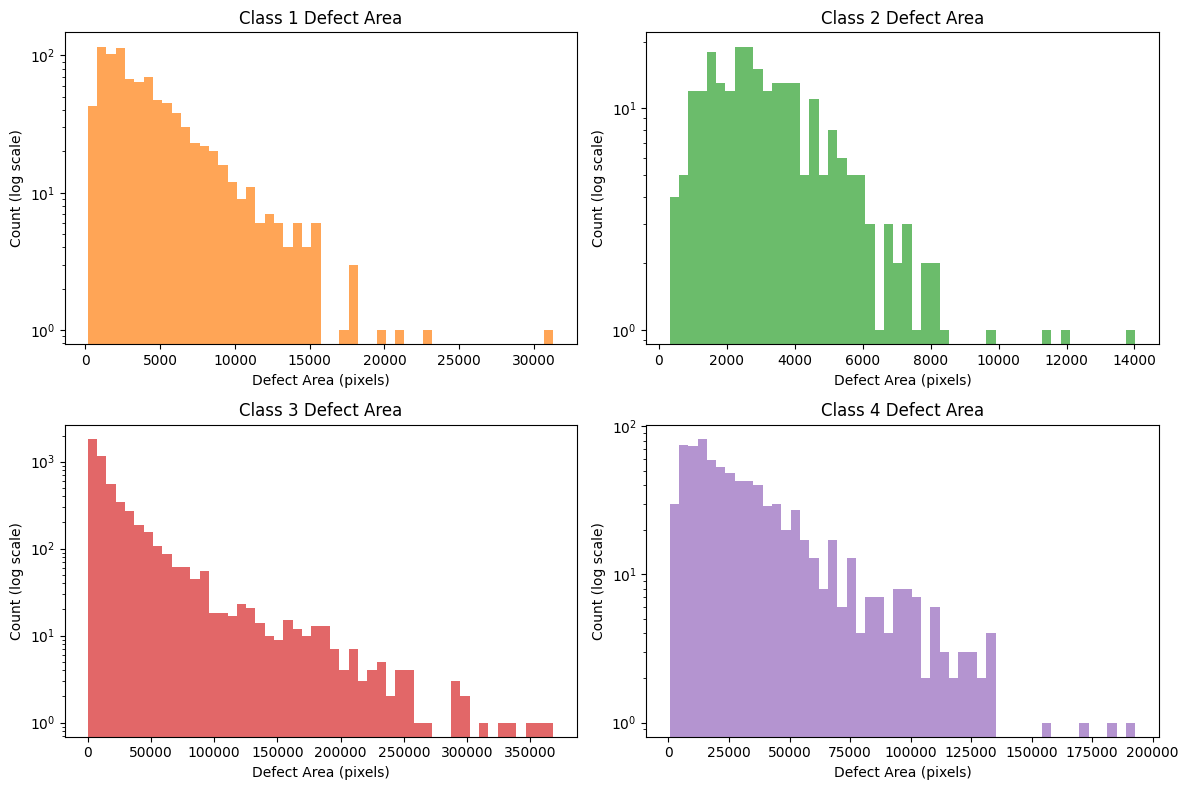

In [48]:
# Optional: Plot area distribution per class (log scale for better visualization)
plt.figure(figsize=(12,8))
for i, class_id in enumerate([1,2,3,4], 1):
    plt.subplot(2, 2, i)
    class_area = df[(df['IsDefect']==1) & (df['ClassId'] == class_id)]['DefectArea']
    plt.hist(class_area, bins=50, alpha=0.7, log=True, color='C'+str(i))
    plt.title(f'Class {class_id} Defect Area')
    plt.xlabel('Defect Area (pixels)')
    plt.ylabel('Count (log scale)')
plt.tight_layout()
plt.show()


In [49]:
df.head(10)

,ImageId,ClassId,EncodedPixels,IsDefect,DefectArea
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,1,4396
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...,1,6897
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...,1,8319
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...,1,69357
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...,1,4851
5,0025bde0c.jpg,3,8458 14 8707 35 8963 48 9219 71 9475 88 9731 8...,1,28506
6,0025bde0c.jpg,4,315139 8 315395 15 315651 16 315906 17 316162 ...,1,17541
7,002af848d.jpg,4,290800 6 291055 13 291311 15 291566 18 291822 ...,1,5001
8,002fc4e19.jpg,1,146021 3 146275 10 146529 40 146783 46 147038 ...,1,1547
9,002fc4e19.jpg,2,145658 7 145901 20 146144 33 146386 47 146629 ...,1,1209


In [50]:
print(df[df['IsDefect']==1]['DefectArea'].describe())

count      7095.000000
mean      23056.669626
std       34957.878108
min         115.000000
25%        4251.000000
50%       10341.000000
75%       26791.000000
max      368240.000000
Name: DefectArea, dtype: float64


In [52]:
df.to_csv('train_with_bboxes.csv', index=False)